# **Retrieving data from OpenStreetMap**

## goals of the tutorial
- understand openstreetmap
- understand the openstreetmap data model
- manage openstreetmap data in geopandas

### requirements
- python knowledge
- geopandas
- gis concepts

### status
"OpenStreetMap is a commons"
---

# Setup

In [44]:
try:
  import pygeos
except ModuleNotFoundError as e:
  !pip install pygeos==0.10.2
  import pygeos

In [ ]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.10.2
  import geopandas as gpd
if gpd.__version__ != "0.10.2":
  !pip install -U geopandas==0.10.2
  import geopandas as gpd

In [46]:
try:
  import pyrosm
except ModuleNotFoundError as e:
  !pip install pyrosm==0.6.1
  import pyrosm

#if pyrosm.__version__ != "0.6.1":
#   !pip install -U pyrosm==0.6.1
#   import pyrosm

# OpenStreetMap

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osm.png)

[slide](https://docs.google.com/presentation/d/e/2PACX-1vT91FHgpKShrTx4H6AlsmLmAb00Pe0QUB_LKugBdoP1N6pAl_sdFKKnDu0msDzmTwxjI7OXh-dbPb-K/pub?start=false&loop=false&delayms=3000)

# RAW Data
OSM XML
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osmdata1.png)

...

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osmdata2.png)

...

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osmdata3.png)

# OverPass API

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/overpassturbo.png)

[http://overpass-turbo.eu/](http://overpass-turbo.eu/)

## Protocol Buffer
[https://developers.google.com/protocol-buffers](https://developers.google.com/protocol-buffers )

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/pbf.png)

Export from HOTOSM

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/export_hotosm.png)

![https://export.hotosm.org/en/v3/exports/91f6bf76-f310-46fe-a6dd-8f230489d1aa](https://export.hotosm.org/en/v3/exports/91f6bf76-f310-46fe-a6dd-8f230489d1aa)

## PYROSM

OpenStreetMap PBF data parser for Python

note: install it always after geopandas

In [47]:
import pyrosm
from pyrosm.data import sources
import matplotlib.pyplot as plt
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

Print available source categories

In [48]:
sources.available.keys()

dict_keys(['africa', 'antarctica', 'asia', 'australia_oceania', 'central_america', 'europe', 'north_america', 'south_america', 'cities', 'subregions'])

Prints a list of countries in Europa that can be downloaded

In [49]:
sources.europe.available

['albania',
 'andorra',
 'austria',
 'azores',
 'belarus',
 'belgium',
 'bosnia_herzegovina',
 'bulgaria',
 'croatia',
 'cyprus',
 'czech_republic',
 'denmark',
 'estonia',
 'faroe_islands',
 'finland',
 'france',
 'georgia',
 'germany',
 'great_britain',
 'greece',
 'hungary',
 'iceland',
 'ireland_and_northern_ireland',
 'isle_of_man',
 'italy',
 'kosovo',
 'latvia',
 'liechtenstein',
 'lithuania',
 'luxembourg',
 'macedonia',
 'malta',
 'moldova',
 'monaco',
 'montenegro',
 'netherlands',
 'norway',
 'poland',
 'portugal',
 'romania',
 'russia',
 'serbia',
 'slovakia',
 'slovenia',
 'spain',
 'sweden',
 'switzerland',
 'turkey',
 'ukraine']

Print a list of all cities that can be downloaded

In [50]:
sources.cities.available

['Aachen',
 'Aarhus',
 'Adelaide',
 'Albuquerque',
 'Alexandria',
 'Amsterdam',
 'Antwerpen',
 'Arnhem',
 'Auckland',
 'Augsburg',
 'Austin',
 'Baghdad',
 'Baku',
 'Balaton',
 'Bamberg',
 'Bangkok',
 'Barcelona',
 'Basel',
 'Beijing',
 'Beirut',
 'Berkeley',
 'Berlin',
 'Bern',
 'Bielefeld',
 'Birmingham',
 'Bochum',
 'Bogota',
 'Bombay',
 'Bonn',
 'Bordeaux',
 'Boulder',
 'BrandenburgHavel',
 'Braunschweig',
 'Bremen',
 'Bremerhaven',
 'Brisbane',
 'Bristol',
 'Brno',
 'Bruegge',
 'Bruessel',
 'Budapest',
 'BuenosAires',
 'Cairo',
 'Calgary',
 'Cambridge',
 'CambridgeMa',
 'Canberra',
 'CapeTown',
 'Chemnitz',
 'Chicago',
 'ClermontFerrand',
 'Colmar',
 'Copenhagen',
 'Cork',
 'Corsica',
 'Corvallis',
 'Cottbus',
 'Cracow',
 'CraterLake',
 'Curitiba',
 'Cusco',
 'Dallas',
 'Darmstadt',
 'Davis',
 'DenHaag',
 'Denver',
 'Dessau',
 'Dortmund',
 'Dresden',
 'Dublin',
 'Duesseldorf',
 'Duisburg',
 'Edinburgh',
 'Eindhoven',
 'Emden',
 'Erfurt',
 'Erlangen',
 'Eugene',
 'Flensburg',
 'Fort

Check all countries having sub-regions


In [51]:
sources.subregions.available.keys()

dict_keys(['brazil', 'canada', 'france', 'germany', 'great_britain', 'italy', 'japan', 'netherlands', 'poland', 'russia', 'usa'])

Check sub-regions in Italy


In [52]:
sources.subregions.italy.available


['centro', 'isole', 'nord_est', 'nord_ovest', 'sud']

there aren't other subregions or cities ... 

for the italian regions, provinces and cities you can use the service made by Wikimedia Italia 

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osm_estratti.png)

[https://osmit-estratti.wmcloud.org/](https://osmit-estratti.wmcloud.org/)

Eg.
[Trento](https://osmit-estratti.wmcloud.org/dati/poly/comuni/pbf/022205_Trento_poly.osm.pbf)



In [53]:
import os

In [54]:
trento_download_pbf_url = "https://osmit-estratti.wmcloud.org/dati/poly/comuni/pbf/022205_Trento_poly.osm.pbf"
# download the data
import requests
#request the file
r = requests.get(trento_download_pbf_url, allow_redirects=True)
#save the file
open('trento.pbf', 'wb').write(r.content)

3813935

In [55]:
osm = pyrosm.OSM("trento.pbf")

In [56]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [57]:
osm.conf.tags.amenity

['addr:city',
 'addr:country',
 'addr:full',
 'addr:housenumber',
 'addr:housename',
 'addr:postcode',
 'addr:place',
 'addr:street',
 'email',
 'name',
 'opening_hours',
 'operator',
 'phone',
 'ref',
 'url',
 'website',
 'yes',
 'amenity',
 'arts_centre',
 'atm',
 'bank',
 'bicycle_parking',
 'bicycle_rental',
 'bicycle_repair_station',
 'bar',
 'bbq',
 'biergarten',
 'brothel',
 'building',
 'building:levels',
 'bureau_de_change',
 'bus_station',
 'bus_stop',
 'cafe',
 'car_rental',
 'car_repair',
 'car_sharing',
 'car_wash',
 'casino',
 'charging_station',
 'childcare',
 'cinema',
 'clinic',
 'college',
 'dentist',
 'doctors',
 'driving_school',
 'drinking_water',
 'fast_food',
 'ferry_terminal',
 'fire_station',
 'food_court',
 'fountain',
 'fuel',
 'gambling',
 'hospital',
 'ice_cream',
 'internet_access',
 'kindergarten',
 'landuse',
 'language_school',
 'library',
 'music_school',
 'nightclub',
 'nursing_home',
 'office',
 'operator',
 'parking',
 'pharmasy',
 'planetarium',
 '

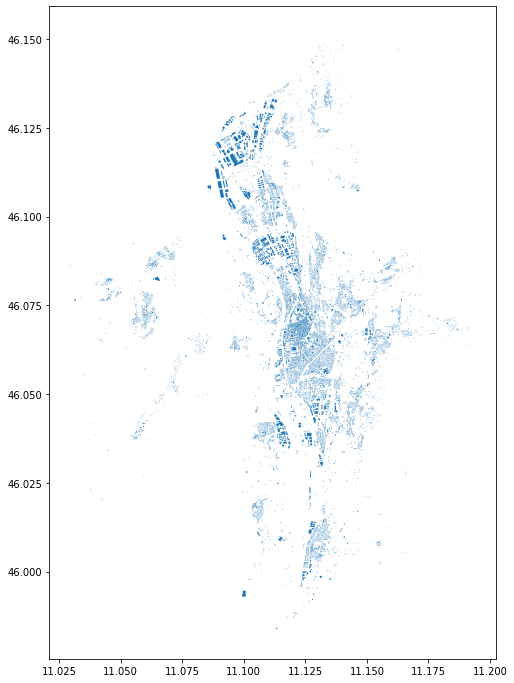

CPU times: user 6.75 s, sys: 164 ms, total: 6.91 s
Wall time: 6.91 s


In [58]:
%%time
buildings = osm.get_buildings()
buildings.plot(figsize=(12,12))
plt.show()


In [59]:
buildings.head(4)

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,operator,...,start_date,wikipedia,id,timestamp,version,geometry,tags,osm_type,levels,changeset
0,None,None,18,None,38122,Piazza del Duomo,None,Palazzo Pretorio,None,None,...,None,it:Palazzo_Pretorio_(Trento),24785843,1594291784,8,"POLYGON ((11.12216 46.06701, 11.12205 46.06701...","{""access"":""customers"",""castle_type"":""palace"",""...",way,NaN,NaN
1,None,None,None,None,None,None,None,P3 - Garage Autosilo Buonconsiglio,Mo-Su 00:00-24:00,Trentino Mobilità S.p.A.,...,None,None,24860487,1627543078,22,"POLYGON ((11.12425 46.07428, 11.12424 46.07429...","{""access"":""yes"",""capacity"":""480"",""capacity:dis...",way,NaN,NaN
2,None,None,None,None,None,None,None,Laboratori Ingegneria,None,None,...,None,None,24862284,1593194970,4,"POLYGON ((11.13954 46.06698, 11.13948 46.06644...",None,way,NaN,NaN
3,None,None,None,None,None,None,None,Mensa e bar Mesiano,Mo-Fr 11:45-14:30,None,...,None,None,24862387,1635544382,3,"POLYGON ((11.13982 46.06637, 11.13981 46.06612...",None,way,NaN,NaN


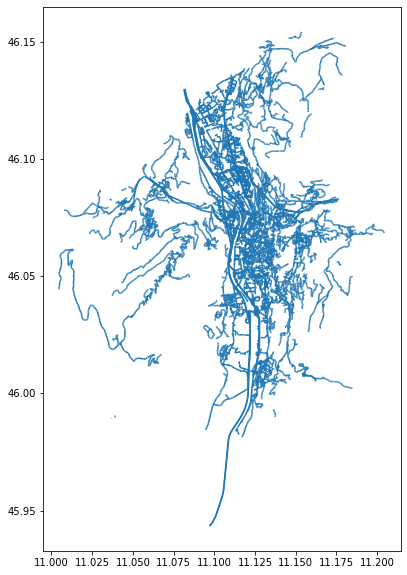

CPU times: user 3.46 s, sys: 24.1 ms, total: 3.48 s
Wall time: 3.48 s


In [60]:
%%time
drive_net = osm.get_network(network_type="driving")
drive_net.plot(figsize=(10,10))
plt.show()

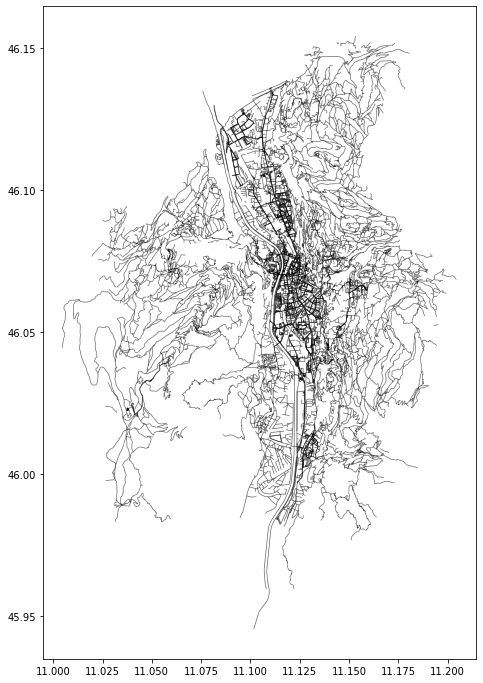

CPU times: user 7.09 s, sys: 47.8 ms, total: 7.13 s
Wall time: 7.13 s


In [61]:
%%time
walk = osm.get_network("walking")
walk.plot(color="k", figsize=(12,12), lw=0.7, alpha=0.6)
plt.show()

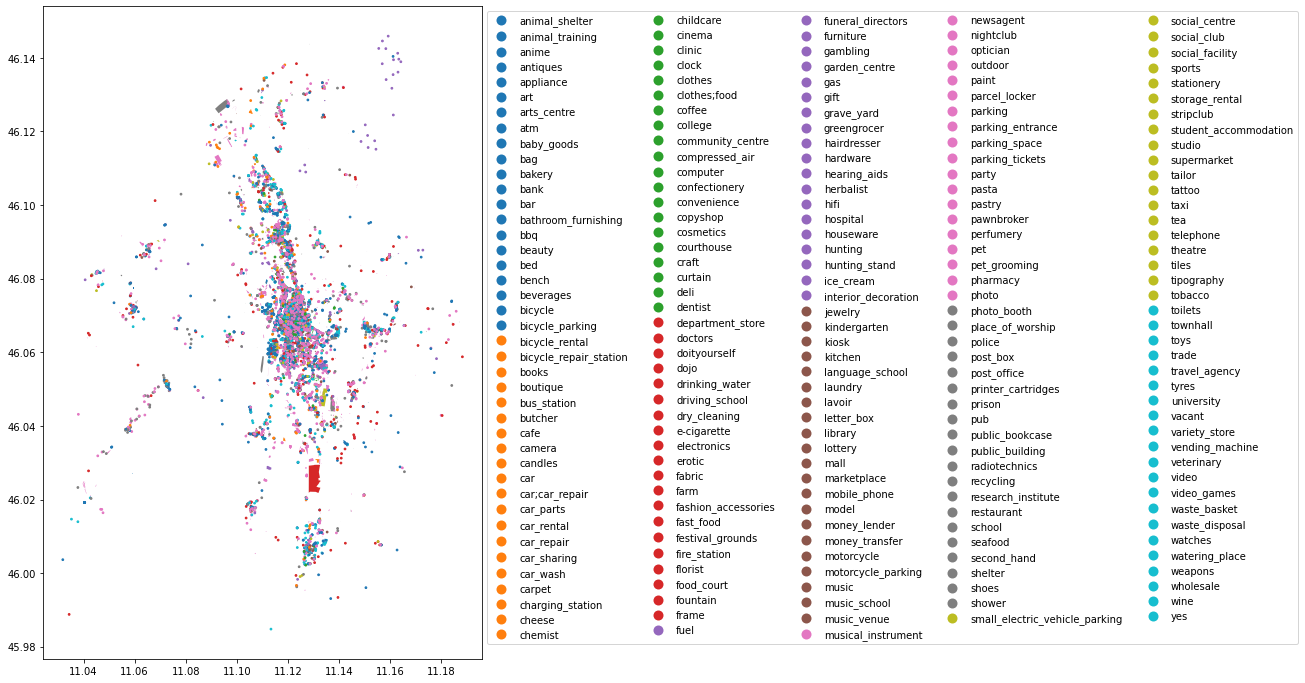

CPU times: user 4.98 s, sys: 168 ms, total: 5.15 s
Wall time: 5.14 s


In [62]:

%%time
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
plt.show()

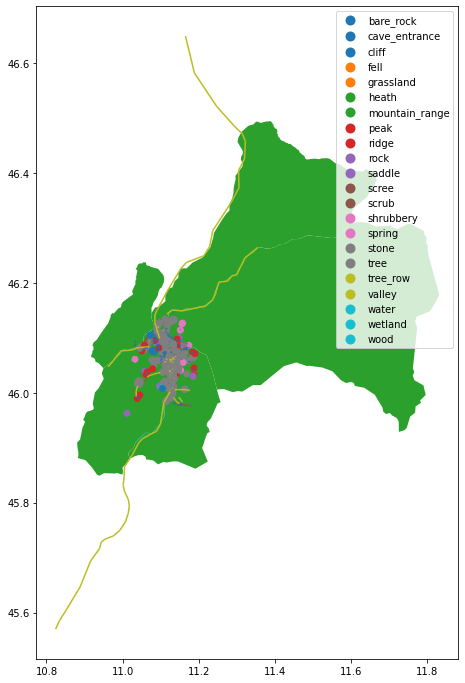

In [63]:
natural = osm.get_natural()
natural.plot(column='natural', legend=True, figsize=(12,12))
plt.show()

---
# Exercises
- download from OpenStreetMap all supermarkets inside the bounding box of the city in this point <br/>latitude: 45.4395<br/>
longitude: 12.3478<br/>

- identify the longest road of the city (state roads, walking routes, motorways are excluded).<br/>

- How many drinking water are in this city?

- how many benches in this city have the backrest?

